#  <span style="color:darkgreen">BUREAUCRACY INDICATORS</span>
<span style="color:seagreen">**2024 Tidytuesday  Week 18** </span>

##  Setup

### Libraries

In [51]:
%load_ext autoreload
%autoreload

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [54]:
from matplotlib import rcParams
from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

#rcParams['font.family'] = 'Roboto'
plt.rcParams['font.family'] = 'Times New Roman'#

###  Data

In [52]:
dd = pd.read_csv('edu_job.csv')
dd.head()

,year,a3,a2,name,edu_level,category,group,value,class
0,2000,AGO,ao,Angola,No Education,Overall,Overall,0.072813,Private
1,2008,AGO,ao,Angola,No Education,Overall,Overall,0.098992,Private
2,2014,AGO,ao,Angola,No Education,Overall,Overall,0.072895,Private
3,2000,AGO,ao,Angola,No Education,Overall,Overall,0.037012,Public
4,2008,AGO,ao,Angola,No Education,Overall,Overall,0.073759,Public


## Data Wrangling

In [4]:
dd.describe()

,year,value
count,1349.000000,1349.000000
mean,2009.085248,0.301776
std,4.944889,0.231723
min,2000.000000,0.000000
25%,2005.000000,0.103021
50%,2010.000000,0.259089
75%,2013.000000,0.460658
max,2020.000000,1.000000


In [14]:
dd_te= dd[dd.edu_level == 'Tertiary Education']
dd_te.head(4)

,year,a3,a2,name,edu_level,category,group,value,class
18,2000,AGO,ao,Angola,Tertiary Education,Overall,Overall,0.033420,Private
19,2008,AGO,ao,Angola,Tertiary Education,Overall,Overall,0.116484,Private
20,2014,AGO,ao,Angola,Tertiary Education,Overall,Overall,0.115511,Private
21,2000,AGO,ao,Angola,Tertiary Education,industry,Education,0.184386,Private


In [17]:
ddg  = dd_te[dd_te.group != 'Overall'].groupby(['name', 'group', 'class'])['value'].mean().reset_index()
ddg.head()

,name,group,class,value
0,Angola,Core Public Administration,Public,0.161766
1,Angola,Education,Private,0.261234
2,Angola,Education,Public,0.213021
3,Angola,Health,Private,0.123636
4,Angola,Health,Public,0.127014


In [28]:
ddgp  =  ddg[ddg['class'] == 'Public'].drop(['class'], axis=1)
ddgp  = ddgp[ddgp.value  > 0]
ddgp.head()

,name,group,value
0,Angola,Core Public Administration,0.161766
2,Angola,Education,0.213021
4,Angola,Health,0.127014
6,Angola,Medical workers,0.193088
7,Angola,Public Administration,0.161224


In [29]:
ddgp[ddgp.name  == 'Angola']

,name,group,value
0,Angola,Core Public Administration,0.161766
2,Angola,Education,0.213021
4,Angola,Health,0.127014
6,Angola,Medical workers,0.193088
7,Angola,Public Administration,0.161224
8,Angola,Public Safety,0.149693
11,Angola,Teachers,0.149008


In [34]:
med_workers_public = ddgp[ddgp.group  == 'Medical workers']

mwp = med_workers_public.drop(['group'], axis=1).set_index('name')
mwp.head()

,value
name,
Angola,0.193088
Botswana,0.860111
Cameroon,0.692308
Ethiopia,0.883080
Kenya,0.204236


##  VIZ

### Custom axis function

In [67]:
def nice_axes(ax):
    ax.set_facecolor('.9')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]

<Axes: xlabel='name'>

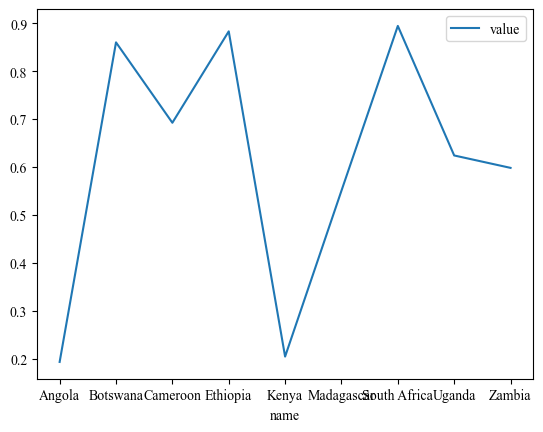

In [55]:
mwp.plot()

### Seaborn

In [58]:
dat = mwp.reset_index().sort_values('value', ascending = False)
dat.head(2)

,name,value
6,South Africa,0.894423
3,Ethiopia,0.883080


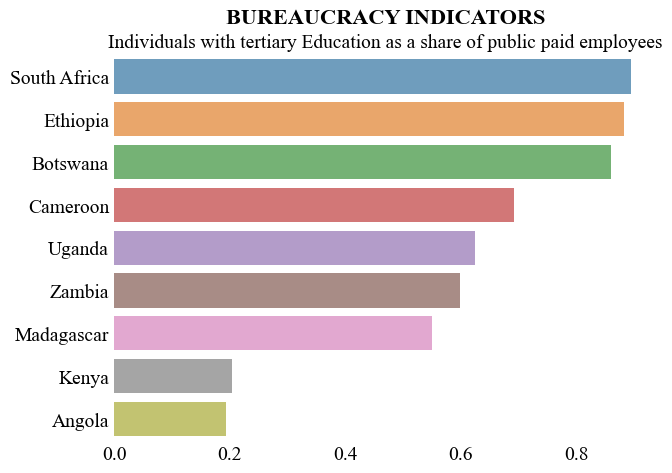

In [95]:

fig, ax = plt.subplots(figsize=(7,5))

sns.barplot(dat, x = 'value',   y = 'name', hue = 'name', alpha  =.7)

ax.text(x=0.5, y=1.07, s='BUREAUCRACY INDICATORS', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.axes.set_title("BUREAUCRACY INDICATORS",fontsize=16)
ax.axes.set_title("Individuals with tertiary Education as a share of public paid employees",fontsize=14)
#ax.set_xlabel("Individuals with tertiary Education as a share of\npublic paid employees",fontsize=12)
ax.set_ylabel(""), ax.set_xlabel("")
ax.set_facecolor('1')
ax.tick_params(labelsize=14, length=0)

[spine.set_visible(False) for spine in ax.spines.values()]

#ax.text(x=0.5, y=1.05, s='text text', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
#p.grid(True, axis='x', color='white')
#p.set_axisbelow(True)


plt.show()

In [70]:
nice_axes(p)
plt.show()

In [ ]:
title = 'BUREAUCRACY INDICATORS'
subtitle = 'Individuals with tertiary Education as a share of\npublic paid employees',